In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
fruits = pd.read_csv('../Data/fruites.csv')

### Training 과 Test Set으로 분리

In [3]:
train_input = fruits.loc[:34,['length','weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [11]:
train_target = fruits.loc[:34,'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

In [12]:
len(train_input) == len(train_target)

True

In [13]:
test_input = fruits.loc[35:, ['length','weight']]
test_target = fruits.loc[35:, ['name']]

In [14]:
from sklearn.neighbors import KNeighborsClassifier # 분류할 꺼니까 classifier
kn = KNeighborsClassifier()

In [15]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [16]:
kn.score(test_input,test_target)

0.0

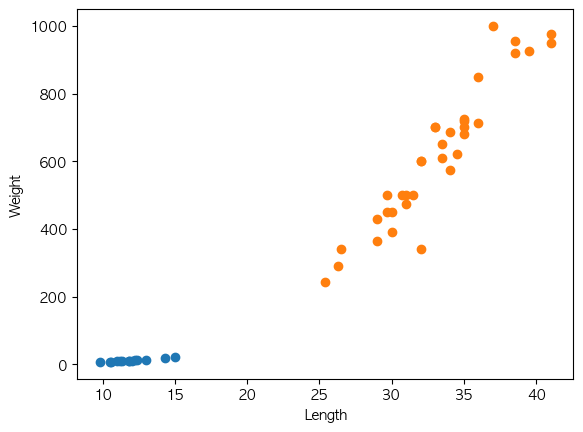

In [19]:
# 산포도로 확인하기
plt.scatter(test_input['length'],test_input['weight'])
plt.scatter(train_input['length'],train_input['weight'])

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

### Sampling 편향이 발생하였다.

#### Numpy를 이용하여 sampling 편향 제거하기

In [20]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [21]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [22]:
index[:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [23]:
train_input = fruits.loc[list(index[:35]),['length','weight']]
train_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [25]:
train_target = fruits.loc[list(index[:35]),['name']]
train_target.head()

,name
13,apple
45,berry
47,berry
44,berry
17,apple


In [26]:
len(train_input) == len(train_target)

True

In [28]:
# test
test_input = fruits.loc[list(index[35:]),['length','weight']]
test_target = fruits.loc[list(index[35:]),['name']]
len(test_input) == len(test_target)

True

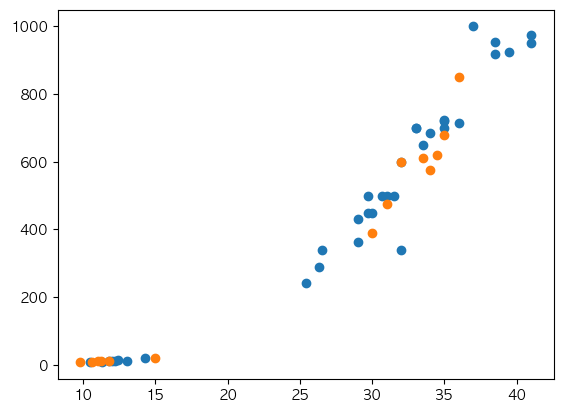

In [30]:
# 잘 스까졌나 scatter로 확인
plt.scatter(train_input.length, train_input.weight)
plt.scatter(test_input.length, test_input.weight)
plt.show()

In [31]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

---
### scikit-learn을 이용

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
train_input, test_input, train_target, test_target = \
train_test_split(fruits[['length','weight']],  fruits['name'], random_state=42) ## random_state = seed

In [35]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [36]:
# 빈도수 세기
import collections

In [40]:
print(collections.Counter(test_target))
print(collections.Counter(train_target))

Counter({'apple': 10, 'berry': 3})
Counter({'apple': 25, 'berry': 11})


In [45]:
# apple과 berry의 비율
print(len(fruits[fruits.name == 'apple']) / len(fruits[fruits.name == 'berry']))
# apple이 berry보다 2.5배 많음

print(11/3)
#그러니 test_split으로 분리한거는 3.6배가 차이가 남으로 맘에 들지 않음

2.5
3.6666666666666665


> appple과 berry의 비율이 비슷하게 할 필요가 있따. <- Sampling의 기본

In [46]:
train_input, test_input, train_target, test_target = \
train_test_split(fruits[['length','weight']],  fruits['name'], 
                 random_state=42, stratify=fruits['name']) # stratify가 잘 나눠줌  ****************** random_state있음

In [48]:
print(collections.Counter(test_target))
print(9/4)

Counter({'apple': 9, 'berry': 4})
2.25


In [49]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0